# Complex Numbers

Many high school programs omit complex numbers, and some treatments even in university are bad (bad pedagogically and sometimes even bad logically). So it's quite possible that a student in this course or a reader of this book will need an upgrade of their skills and understanding. Luckily, looked at the right way, the basics are very simple, and there is some amazing new pedagogy made possible by use of computer graphics.

We should point out that most of the hate directed at complex numbers is because arithmetic by hand is a bit more involved than that for real arithmetic, especially division.  But, really, nobody has to do complex arithmetic by hand more than a few times to get the hang of it, anymore.  The drudgery is quite usefully relegated to a computer.

Let's begin by clearing out some logical `underbrush' in order to clarify the issues. Plot $y = x^2 + 1$ on, say, $-2 \leq x \leq 2$.

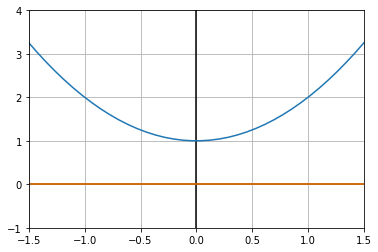

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2, 2, 50)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x, x*x + 1)
plt.plot(x, x*0)
plt.xlim(-1.5,1.5)
plt.ylim(-1,4)
plt.show()

Very clearly there _is no real $x$_ where $x^2 + 1  = 0$. Said another way, there is no _real number_ which, when multiplied by itself, gives $-1$.

Because mathematicians use the words "real number" to mean numbers that are the limits of converging sequences of rational numbers (which gives a solid definition to them), and in the meantime the word "real" has an entirely different meaning in the "real world", we have an unfortunate opportunity for miscommunication.  The phrase "there is no _real number_ which when squared gives $-1$" sounds almost _exactly_ like "There is _no such thing_ as the square root of $-1$" and this misconception lies at the heart of most people's difficulty with $i$.  This is compounded by calling $i$ an "imaginary" number, because it's "not real" ($\equiv$ "not a real number").  Funny joke! Gah!  Mathematicians.  

Even the word "number" has different meanings in math than in real life.  If your partner says "I have a number of things to talk to  you about" it certainly doesn't mean they have nothing to say!  Whereas to a mathematician, zero is a perfectly good number.  The collision between math language and ordinary language really does cause problems sometimes.

This is quite unfortunate, because as we will now show concretely, $i$ actually _does_ exist; there's nothing imaginary about it. It's a real thing, but for sure it _isn't a "real number"_.

What is it? The complex number $i$ is defined to be the _pair_ of real numbers $(0, 1)$:
```{math}
	i := (0, 1) \>.
```
The rules for adding and subtracting complex numbers (pairs of real numbers) are easy:
```{math}
	(a, b) \pm (c, d) = \left(a \pm c, b \pm d\right)
```
(just add or subtract component-wise, like vectors). Multiplication has a funny rule:
```{math}
	(a, b) \cdot (c, d) = (ac - bd, ad+bc)\>.
```
We will see shortly that this rule makes more sense in polar coordinates. For now, note that $(a, 0)\cdot(c, 0) = (ac, 0)$ so that if the second component is zero, these complex numbers act just like real numbers. Mathematicians say that the set of complex numbers contain an isomorphic copy of the real numbers. The complex number $(-1, 0)$ is the copy of the real number $-1$. Notice now $(0, 1)\cdot(0, 1) = (0\cdot 0 - 1\cdot 1, 0\cdot 1 + 0\cdot 1) = (-1, 0)$ or $i^2 = (-1, 0)$, the copy of $-1$.

At this point most people's brains go, Click! "Why didn't teachers just _say_ this?" Well, two reasons.  First, most people will just want to "get on with it" and go, and it all works, so why fuss? Second, it actually took a long time for this simple idea to be thought of. People were just say "Well, let $i$ be the square root of $-1$ even if there's no such thing, and then the following computation is easy." The French mathematician Argand was apparently the first to think of $i = (0, 1)$, over nearly two hundred years after $i$ had been used to find (real!) roots of cubic equations. The great C. F. Gauss, revered as one of the best mathematicians and physicists ever, took the idea further and gave the first proof of the "Fundamental Theorem of Algebra," namely that a polynomial of degree $n$ has exactly $n$ roots, counting multiplicities.

## Polar Coordinates for Complex Numbers
When the famous physicist Richard Feynman talked about multiplication of complex numbers, he didn't use the Cartesian rule $(a, b)\cdot (c, d) = (ac - bd, ad + bc)$ but rather said, in words, "multiply the magnitudes and add the angles." This is much simpler to understand geometrically and much more believable that such a rule could be useful in real (physical) life. So, how does it work?

```{figure} ../Figures/Complex\ Numbers/polar_coordinates.png
---
name: polarcoordinates
---
```

To get to the point $P = (a, b)$ from the origin, one needn't walk $a$ units in the $\operatorname{Re}$ direction, turn left $90$&deg; and walk $b$ units. Instead, one can head off at angle $\theta$ and walk $r$ units. By trigonometry,
```{math}
\begin{align*}
	b &= r\sin\theta \\
	a &= r\cos\theta
\end{align*}
```
and by Pythagoras' Theorem
```{math}
	r^2 = a^2 + b^2 \quad \text{so} \quad r = \sqrt{a^2 + b^2} \>.
```
Computing $\theta$ from $a$ and $b$ is a little more awkward than the usual high school treatment, and for many purposes all we need are (if $r\neq 0$)
```{math}
	\sin\theta = \dfrac{b}{r} = \dfrac{b}{\sqrt{a^2 + b^2}}
```
and
```{math}
	\cos\theta = \dfrac{a}{r} = \dfrac{a}{\sqrt{a^2 + b^2}} \>.
```
\textsl{Taking the ratio loses one important bit of information}, namely the quadrant:
```{math}
	\dfrac{\sin\theta}{\cos\theta} = \tan\theta = \dfrac{b}{a} \>.
```

```{figure} ../Figures/Complex\ Numbers/polar_coordinates1.png
---
name: polarcoordinates1
---
```

Since $\frac{-b}{-a} = \frac{b}{a}$, once we've computed the ratio, there's no way to detect the quadrant: is it I or III? If $\frac{b}{a}$ is negative, is it II or IV? To get around this, most computer languages define a _two-argument_ arctan function:
```{math}
	\theta = \operatorname{arctan}\left(b, a\right) \>.
```
Moreover, we take conventionally $-\pi < \theta \leq \pi$, so if $(a, b) = (-1, 0)$ then $\theta = \pi$. Since $\sin \pi = 0$ and $\cos \pi = -1$, this agrees with experience.

````{prf:theorem} The multiplication rule in polar coordinates
:label: multiplication
If $z_1 = (a_1, b_1) = r_1\angle\theta_1$ is one number and $z_2 = (a_2, b_2) = r_2 \angle \theta_2$ is another, then their product is
```{math}
	z_3 = (r_1r_2)\angle \theta_1 + \theta_2 \>.
```
That is,
```{math}
	r_3 = r_1r_2 \quad \text{multiply the magnitudes}
```
and
```{math}
	\theta_3 = \theta_1 + \theta_2 \quad \text{add the angles.}
```

```{figure} ../Figures/Complex\ Numbers/polar_coordinates2.png
---
name: polarcoordinates2
---
```

If $\theta_1 + \theta_2$ lies outside $-\pi < \theta_3 \leq \pi$, add or subtract $2\pi$ until it is; that doesn't change $\sin\theta_3$ or $\cos\theta_3$, which is all we care about.
````

````{prf:proof}
Use
```{math}
	\begin{align*}
		\cos\left(\theta_1 + \theta_2\right) &= \cos\theta_1\cos\theta_2 - \sin\theta_1\sin\theta_2 \\
		\sin\left(\theta_1 + \theta_2\right) &= \sin\theta_1\cos\theta_2 + \sin\theta_2\cos\theta_1
	\end{align*}
```
and prove it yourself.
````

````{prf:example}
Multiply $a + ib$ by $a - ib$.

```{figure} ../Figures/Complex\ Numbers/polar_coordinates3.png
---
name: polarcoordinates3
---
```

Pretty clearly the angle for $(a, -b)$ is the negative of that for $(a, b)$. Also the magnitudes are the same: 
```{math}
	r = \sqrt{a^2 + b^2} = \sqrt{a^2 + (-b)^2} \>.
```
Therefore
```{math}
\begin{align*}
	\left(a + ib\right) \cdot \left(a - ib\right) &= r \cdot r \angle \theta - \theta \\
	&= r^2 \angle 0 \\
	&= a^2 + b^2 \angle 0
\end{align*}
```
which is a real nonnegative number!
	
Check in Cartesian:
```{math}
\begin{align*}
	(a, b) \cdot (a, -b) &= (a\cdot a - b\cdot(-b), a\cdot(-b) + b\cdot a) \\
	&= (a^2 + b^2, 0)
\end{align*}
```
just the same. The number $\bar{z} = a - ib = (a, -b)$ is called the _conjugate_ of $z = a + ib = (a, b)$.
````

```{note}
If $r = 0$, $\theta$ is not defined. If you have to walk zero steps does it matter which direction you have to walk them in?
```

````{prf:theorem} Euler's Theorem: $e^{i\theta} = \cos\theta + i\sin\theta$
:label: euler
The notation $r\angle \theta$ is rarely seen, not because it's so ugly but because there's something better: $z = r\angle \theta = re^{i\theta}$ where $e = 2.7182818284\ldots$ is the base of the natural logarithm. This is because of Euler's theorem, which states $e^{i\theta} = \cos\theta + i\sin\theta$. Then
```{math}
\begin{align}
	z = a + ib &= r\cos\theta + ir\sin\theta \\
	&= r\left(\cos\theta + i\sin\theta\right) = re^{i\theta} \>.
\end{align}
```
Then the multiplication rule fits the addition law of multiplying exponentials:
```{math}
	r_1e^{i\theta_1} \cdot r_2 e^{i\theta_2} = r_1r_2 e^{i\left(\theta_1 + \theta_2\right)} \>.
```
````

Why is $e^{i\theta} = \cos\theta + i\sin\theta$? Sometimes this is just taken as a _definition_ of $e^{i\theta}$. That may not satisfy. Another proof uses Taylor series, which is convincing in this case if one is comfortable with the Taylor series
```{math}
\begin{alignat*}{24}
	e^{i\theta} &= &&1 &&+ &&\left(i\theta\right) &&+ &&\dfrac{\left(i\theta\right)^2}{2!} &&+ &&\dfrac{\left(i\theta\right)^3}{3!} &&+ &&\dfrac{\left(i\theta\right)^4}{4!} &&+ &&\cdots \\
	\cos\theta &= &&1 &&&&&&- &&\dfrac{\theta^2}{2!}&&&&&&+ &&\dfrac{\theta^4}{4!}&&-&&\cdots \\
	\sin\theta &= &&&&&&&\theta &&&&&-&&\dfrac{\theta^3}{3!} & &&&& &+&&\cdots
\end{alignat*}
```
Another way is by differential equation: $e^{at}$ solves 
```{math}
	\dfrac{\text{d}y}{\text{d}t} = ay
```
and so one expects $e^{i\theta}$ to solve $\frac{\text{d}y}{\text{d}\theta} = iy$. But if $Y = \cos\theta + i\sin\theta$ then
```{math}
\begin{align*}
	\dfrac{\text{d}Y}{\text{d}\theta} &= -\sin\theta + i\cos\theta \\
	&= i\left(\cos\theta + i\sin\theta\right) \quad \text{because } i^2 = -1
\end{align*}
```
so $Y$ also solves this; since $\cos 0 = 1$, $\sin 0 = 0$, $e^{i\cdot 0} = 1$, by uniqueness of solutions of this DE, we must have $e^{i\theta} = y = Y = \cos\theta + i\sin\theta$. There are other proofs: people are keen to prove it in different ways because it's such a strange result. One can use trig identities to show that
```{math}
\begin{align*}
	&\left(\cos\theta_1 + i\sin\theta_1\right)\left(\cos\theta_2 + i\sin\theta_2\right) \\
	&= \left(\cos\theta_1\cos\theta_2 - \sin\theta_1\sin\theta_2\right) + i\left(\cos\theta_1\sin\theta_2 + \sin\theta_1\cos\theta_2\right) \\
	&= \cos\left(\theta_1 + \theta_2\right) + i\sin\left(\theta_1 + \theta_2\right)
\end{align*}
```
which satisfies the same functional equation as $e^{i\theta_1}\cdot e^{i\theta_2} = e^{i\left(\theta_1 + \theta_2\right)}$, and maybe this proof scratches the deepest itch.

One can run this backwards, like so
```{math}
\begin{align*}
	e^{i\theta} &= \cos\theta + i\sin\theta \\
	e^{-i\theta} &= \cos\left(-\theta\right) + i\sin\left(-\theta\right) = \cos\theta - i\sin\theta
\end{align*}
```
because cosine is even and sine is odd.
```{math}
\begin{align*}
	\therefore \text{ adding gives} \quad e^{i\theta} + e^{-i\theta} &= 2\cos\theta \\
	\text{subtracting gives} \quad e^{i\theta} - e^{-i\theta} &= 2i\sin\theta
\end{align*}
```
so
```{math}
\begin{align*}
	\cos\theta &= \dfrac{e^{i\theta} + e^{-i\theta}}{2} \\
	\sin\theta &= \dfrac{e^{i\theta} - e^{-i\theta}}{2i} \>.
\end{align*}
```
These lovely formulae make trig identities simpler, like so:
```{math}
\begin{align*}
	\cos^3\theta &= \left(\dfrac{e^{i\theta} + e^{-i\theta}}{2}\right)^{3} \\
	&= \dfrac{e^{i\cdot3\theta} + 3e^{i\cdot2\theta}\cdot e^{-i\theta} + 3\cdot e^{i\theta}\cdot e^{-2i\theta} + e^{-i\cdot 3\theta}}{8} \\
	&= \dfrac{e^{i\cdot 3\theta} + e^{-i\cdot 3\theta}}{8} + \frac{3}{4}\left(\dfrac{e^{i\theta} + e^{-i\theta}}{2}\right) \\
	&= \dfrac{1}{4} \cos 3\theta + \frac{3}{4}\cos\theta \>.
\end{align*}
```
<!-- In Maple:\
<span style='color:red'>
\MapleInput{convert(cos($\theta$, exp)}
\MapleOutput{$\dfrac{e^{I\theta}}{2} + \dfrac{e^{-I\theta}}{2}$}
\MapleInput{convert(exp(I*t), trig)}
\MapleOutput{$\cos(t) + \text{I}\sin(t)$}
</span> -->

## Complex Weirdness
Now that we have $e^{i\theta}$ we can define $e^z$: if $z = x + iy$, we define it as $e^{x + iy} = e^{x}\cdot e^{iy} = e^{x}\left(\cos y + i\sin y\right)$.

So what? 

...so for instance defining $z^b$ as $e^{b\ln z}$,
```{math}
\begin{alignat*}{4}
	i^i &= e^{i\ln i} &&= e^{i\left(\ln 1 + i\cdot\frac{\pi}{2}\right)} \\
	&= e^{i\left(\frac{i\pi}{2}\right)} &&= e^{-\frac{\pi}{2}} \in \mathbb{R} \>.
\end{alignat*}
```

Say what?

Well, if $w = e^{z} = e^{x + iy}$ then $\left|w\right|$ is the magnitude of 
```{math}
w = \left|\left(e^x\cos y, e^{x}\sin y\right)\right| = \sqrt{e^{2x}\cos^2y + e^{2x}\sin^2y}= e^x\cdot\sqrt{\cos^2y + \sin^2y} = e^x \>,
```
and 
```{math}
\operatorname{arg} w = \operatorname{arctan}\left(e^x\sin y, e^x\cos y\right) = y
```
if $-\pi < y \leq \pi$ so we can define $\ln w = x + iy$ if $-\pi < y \leq y$ so $\ln\left(i\right) = \ln\left(e^{\frac{i\pi}{2}}\right) = \frac{i\pi}{2}$ so $i^i = e^{-\frac{\pi}{2}}$ is real.

... If you say so

<!-- Look, let's do this in Maple.

<span style='color:red'>
\MapleInput{I\string^I;}
\MapleOutput{$\text{I}^\text{I}$}
</span>
    
That didn't do much.

<span style='color:red'>
\MapleInput{simplify(\%);}
\MapleOutput{$e^{-\frac{\pi}{2}}$}
\MapleInput{evalf(\%);}
\MapleOutput{0.2078795763}
\MapleInput{Complex(0, 1.0)\string^Complex(0, 1.0);}
\MapleOutput{0.2078795764+0.~I}
</span> -->
    
But there's more to this
```{math}
	\ln\left(1\right) = 2\pi ik
```
for any integer $k$ because
```{math}
\begin{align*}
	e^{2\pi ik} &= \cos\left(2\pi k\right) + i\cdot \sin\left(2\pi k\right) \\
	&= 1 + i\cdot 0 = 1 \>.
\end{align*}
```
So, actually, $i$ has an _infinite number_ of logarithms:
```{math}
	\ln i ?= \dfrac{i\pi}{2} + 2i\pi k
```
for any integer $k$':
```{math}
\begin{align*}
	e^{\frac{i\pi}{2} + 2\pi ik} &= \cos\left(\frac{\pi}{2} + 2\pi k\right) + i\sin\left(\frac{\pi}{2} + 2\pi k\right) \\
	&= \cos\frac{\pi}{2} + i\sin\frac{\pi}{2} = 0 + i\cdot 1 = i
\end{align*}
```
because $\cos$ and $\sin$ are periodic with period $2\pi$.

Let's use David Jeffrey's notation and say
```{math}
	\ln_k z = \ln z + 2\pi k \>.
```
Therefore, we _could have_ (but didn't) define
```{math}
	i^{i} ?= e^{i \ln_k i} = e^{i\left(\frac{i\pi}{2} + 2\pi ik\right)} = e^{-\frac{\pi}{2} - 2\pi k}
```
an infinite number of possible real values. This isn't the weirdest thing about complex numbers; but following the rules, it will all make sense, and some of it will be very useful indeed.

We just have to share an interesting new fact from Twitter. Christopher D. Long ([@octonion](https://twitter.com/octonion)) asked about the infinite tower of powers
```{math}
c = i^{i^{i^{\cdot^{\cdot^{\cdot}}}}}
```
and was surprised to learn that this thing has a _known value_ (well, for a certain value of "known").  Actually, we were surprised, too, at how simple it turned out to be.
The answer involves the Lambert W function: see [The Lambert W Function Poster](http://www.orcca.on.ca/LambertW) for a picture.  The answer is that
```{math}
c = \frac{2i}{\pi} W\left( \frac{\pi}{2i} \right)
```
To prove that, we have to carefully define that tower.  We do so this way: put $c_0 = 0$, and $c_{n+1} = i^{c_n}$ for $n\ge 0$. This can be implemented in Python, and we do so now. The approach to the limit is a bit slow, but $1000$ terms are enough.

In [2]:
from scipy import special as spc
import numpy as np
import math as mth
c = 2.0j*spc.lambertw( mth.pi/(2.0j) )/mth.pi
print( c )
N = 1000
xi = np.zeros(N,dtype=complex)
xi[0] = 0.0  # we already knew this
for k in range(N):
    xi[k] = 1.0j**xi[k-1]
print( xi[-1] )
print( abs( c - xi[-1] )/abs(c) )

(0.4382829367270321+0.36059247187138554j)
(0.4382829367270323+0.3605924718713857j)
4.149620759862427e-16
